# Introduction

Here I'm testing the A2C on the taxi grid graph


### First test the optimal cab

In [4]:
import networkx as nx
import csv
import copy
import funcs as f
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent_taxi import Agent
from agent_taxi import PolicyCab
from taxi_environment import Env
from keras.utils import to_categorical
%matplotlib inline

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

time_per_episode = 10**3

#Environment
n = 10
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)


#Agent
p = np.array([G.nodes[i]['prob'] for i in range(G.number_of_nodes())])
optimal_policy = f.find_optimal_policy(p,G)
model_cab = PolicyCab(optimal_policy,G)

taus = []
num_episodes = 10
for episode in range(num_episodes):
    
    state = state_zero
    while model_cab.active_time <= time_per_episode:
        action = model_cab.act(state)
        next_state, reward = env.step(action,model_cab)
        state = next_state
    tau = model_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,model_cab.find_tau()))
    model_cab.reset_clocks()
tau_optimal = np.mean(taus)
tau_optimal

(episode, tau) = (0, 0.060939060939060936)
(episode, tau) = (1, 0.06293706293706294)
(episode, tau) = (2, 0.07692307692307693)
(episode, tau) = (3, 0.06393606393606394)
(episode, tau) = (4, 0.07892107892107893)
(episode, tau) = (5, 0.06893106893106893)
(episode, tau) = (6, 0.07092907092907093)
(episode, tau) = (7, 0.058941058941058944)
(episode, tau) = (8, 0.06393606393606394)
(episode, tau) = (9, 0.061938061938061936)


0.06683316683316684

### Random cab

In [5]:
#Environment
n = 10
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)


#Agent
p = np.array([G.nodes[i]['prob'] for i in range(G.number_of_nodes())])
optimal_policy = f.find_optimal_policy(p,G)
model_cab = PolicyCab(optimal_policy,G)


num_episodes = 10
taus = []
for episode in range(num_episodes):
    
    state = state_zero
    while model_cab.active_time <= time_per_episode:
        state_scalar = np.where(state==1)[0][0]
        neighbours = G[state_scalar].keys()
        action = np.random.choice(range(len(neighbours)))
        next_state, reward = env.step(action,model_cab)
        state = next_state
    tau = model_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,tau))
    model_cab.reset_clocks()
tau_random = np.mean(taus)

(episode, tau) = (0, 0.11488511488511488)
(episode, tau) = (1, 0.11388611388611389)
(episode, tau) = (2, 0.12087912087912088)
(episode, tau) = (3, 0.14185814185814186)
(episode, tau) = (4, 0.11388611388611389)
(episode, tau) = (5, 0.10989010989010989)
(episode, tau) = (6, 0.11588411588411589)
(episode, tau) = (7, 0.08591408591408592)
(episode, tau) = (8, 0.1008991008991009)
(episode, tau) = (9, 0.13186813186813187)


### RL agent

(episode, tau, score) = (50, 0.14, -496.0)
(episode, tau, score) = (100, 0.172, 660.0)
(episode, tau, score) = (150, 0.114, 886.0)
(episode, tau, score) = (200, 0.121, 979.0)
(episode, tau, score) = (250, 0.233, 697.0)
(episode, tau, score) = (300, 0.058, 1042.0)
(episode, tau, score) = (350, 0.06, 960.0)
(episode, tau, score) = (400, 0.034, 1146.0)
(episode, tau, score) = (450, 0.302, 508.0)
(episode, tau, score) = (500, 0.05, 1010.0)
(episode, tau, score) = (550, 0.057, 833.0)
(episode, tau, score) = (600, 0.062, 838.0)
(episode, tau, score) = (650, 0.317, 333.0)
(episode, tau, score) = (700, 0.034, 1016.0)
(episode, tau, score) = (750, 0.024, 1086.0)
(episode, tau, score) = (800, 0.033, 1077.0)
(episode, tau, score) = (850, 0.048, 1002.0)
(episode, tau, score) = (900, 0.077, 953.0)
(episode, tau, score) = (950, 0.045, 855.0)
(episode, tau, score) = (1000, 0.057, 793.0)
(episode, tau, score) = (1050, 0.048, 882.0)
(episode, tau, score) = (1100, 0.047, 853.0)
(episode, tau, score) = (

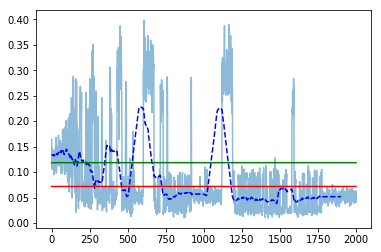

In [24]:
EPISODES = 2000


#Environment
n = 10
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)
num_states = env.num_states
num_actions = env.num_actions
env.illegal_move_penalty = -100.0
env.pickup_reward = 10.0

#Agent
lr = 0.001
gamma = 0.01
agent = Agent(num_states, num_actions, lr, gamma)
agent.memory_size = 1000

scores = []

for e in range(1,EPISODES+1):
    state = state_zero
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    while agent.active_time < time_per_episode:
        
        # env.render()
        action = agent.act(state)
        next_state, reward = env.step(action,agent)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        
        #We only want to remember action taken when looking
        if agent.state == 'serving':
            pass
        else:
            agent.remember(state[0], action, 1.0*reward)
        state = next_state
    
    #Learn & print results
    agent.train_models()
    tau = agent.find_tau()
    scores.append(tau)
    agent.reset_clocks()
    if e % 50 == 0:
        print '(episode, tau, score) = ' + str((e,tau,reward_sum))

        
plt.plot(scores,alpha=0.5)
plt.plot(running_mean(scores,100),'b--')
plt.plot([tau_random for i in scores],'g-')
plt.plot([tau_optimal for i in scores],'r-')
#np.savetxt('stats/scores_lunar_landing.txt',scores)

In [29]:
policy = {}
for state_scalar in range(num_states):
    state_vec = np.array([[1 if i == state_scalar else 0 for i in range(G.number_of_nodes())]])
    action_probs = agent.actor.model.predict(state_vec)[0]
    print action_probs
    best_action = np.argmax(action_probs)
    best_action = 0
    neighbours = G[state_scalar].keys()
    policy[state_scalar] = neighbours[best_action]

[1.2795108e-04 9.9987209e-01 3.7474553e-08 3.4169403e-09]
[2.9641113e-04 9.9970347e-01 1.7602632e-07 1.7553706e-08]
[2.4877216e-03 9.9749964e-01 1.0526049e-05 2.0748319e-06]
[2.0776948e-02 9.7840810e-01 6.1179261e-04 2.0313474e-04]
[3.4425283e-04 9.9965549e-01 2.4896514e-07 3.0095769e-08]
[2.0842329e-03 9.9790668e-01 7.6758261e-06 1.4590648e-06]
[6.1691407e-04 9.9938226e-01 7.2808035e-07 9.7764051e-08]
[4.8452760e-03 9.9510717e-01 3.8654412e-05 8.8769848e-06]
[9.8798133e-04 9.9900985e-01 1.8516030e-06 2.6679169e-07]
[4.1556021e-04 9.9958414e-01 3.7923795e-07 4.7287951e-08]
[2.8948920e-02 9.6935630e-01 1.2206899e-03 4.7395876e-04]
[9.9267077e-04 9.9900538e-01 1.8332702e-06 2.6773151e-07]
[4.1256826e-03 9.9583876e-01 2.9215655e-05 6.3637494e-06]
[2.31267069e-04 9.99768674e-01 1.08945521e-07 1.13656755e-08]
[1.3609017e-03 9.9863499e-01 3.3970925e-06 5.6724895e-07]
[6.3714664e-03 9.9355894e-01 5.4672244e-05 1.4896995e-05]
[3.5320108e-03 9.9644572e-01 1.8247780e-05 4.0587474e-06]
[4.3104906

In [30]:
deterministic_cab = PolicyCab(policy,G)

taus = []
num_episodes, time_per_episode = 10, 10**4
for episode in range(num_episodes):
    
    state = state_zero
    while deterministic_cab.active_time <= time_per_episode:
        action = deterministic_cab.act(state)
        next_state, reward = env.step(action,deterministic_cab)
        state = next_state
    tau = deterministic_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,deterministic_cab.find_tau()))
    deterministic_cab.reset_clocks()
np.mean(taus)

(episode, tau) = (0, 0.06929307069293071)
(episode, tau) = (1, 0.06619338066193381)
(episode, tau) = (2, 0.06779322067793221)
(episode, tau) = (3, 0.060993900609939006)
(episode, tau) = (4, 0.0683931606839316)
(episode, tau) = (5, 0.06529347065293471)
(episode, tau) = (6, 0.064993500649935)
(episode, tau) = (7, 0.06229377062293771)
(episode, tau) = (8, 0.06229377062293771)
(episode, tau) = (9, 0.0638936106389361)


0.06514348565143485

Looks good! I'll try on the real NYC now.

### Repeat

(episode, tau, score) = (50, 0.148, -613.0)
(episode, tau, score) = (100, 0.177, 485.0)
(episode, tau, score) = (150, 0.143, 748.0)
(episode, tau, score) = (200, 0.089, 1021.0)
(episode, tau, score) = (250, 0.144, 816.0)
(episode, tau, score) = (300, 0.051, 1009.0)
(episode, tau, score) = (350, 0.032, 1058.0)
(episode, tau, score) = (400, 0.051, 999.0)
(episode, tau, score) = (450, 0.325, 345.0)
(episode, tau, score) = (500, 0.019, 1101.0)
(episode, tau, score) = (550, 0.062, 1028.0)
(episode, tau, score) = (600, 0.051, 959.0)
(episode, tau, score) = (650, 0.032, 1108.0)
(episode, tau, score) = (700, 0.03, 1050.0)
(episode, tau, score) = (750, 0.036, 1014.0)
(episode, tau, score) = (800, 0.032, 1108.0)
(episode, tau, score) = (850, 0.024, 1096.0)
(episode, tau, score) = (900, 0.029, 1081.0)
(episode, tau, score) = (950, 0.024, 1086.0)
(episode, tau, score) = (1000, 0.025, 1075.0)
(episode, tau, score) = (1050, 0.033, 1097.0)
(episode, tau, score) = (1100, 0.071, 989.0)
(episode, tau, s

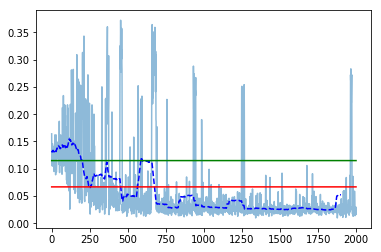

In [6]:
EPISODES = 2000


#Environment
n = 10
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)
num_states = env.num_states
num_actions = env.num_actions
env.illegal_move_penalty = -100.0
env.pickup_reward = 10.0

#Agent
lr = 0.001
gamma = 0.01
agent = Agent(num_states, num_actions, lr, gamma)
agent.memory_size = 1000

scores = []

for e in range(1,EPISODES+1):
    state = state_zero
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    while agent.active_time < time_per_episode:
        
        # env.render()
        action = agent.act(state)
        next_state, reward = env.step(action,agent)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        
        #We only want to remember action taken when looking
        if agent.state == 'serving':
            pass
        else:
            agent.remember(state[0], action, 1.0*reward)
        state = next_state
    
    #Learn & print results
    agent.train_models()
    tau = agent.find_tau()
    scores.append(tau)
    agent.reset_clocks()
    if e % 50 == 0:
        print '(episode, tau, score) = ' + str((e,tau,reward_sum))

        
plt.plot(scores,alpha=0.5)
plt.plot(running_mean(scores,100),'b--')
plt.plot([tau_random for i in scores],'g-')
plt.plot([tau_optimal for i in scores],'r-')
#np.savetxt('stats/scores_lunar_landing.txt',scores)

Looks good!